In [7]:
import battleship as ship
import genetic_algorithm as ga

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Correct number of pieces on board
0000000000000000000000100000000010100000001010111100101000000010000001000000000100001100010000000000


,A,B,C,D,E,F,G,H,I,J
ylabel,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0
6,0,0,1,0,1,0,1,1,1,1
5,0,0,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,0,1


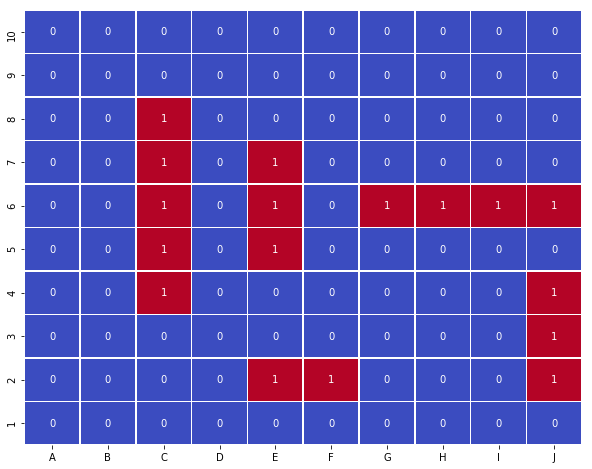

In [45]:
#create a new board and solution
board, solution = ship.new_board()

# print the genetic solution
print(solution)

# add the board to a dataframe for plotting
df = pd.DataFrame(board, columns=['A','B','C','D','E','F','G','H','I','J',])
df['ylabel'] = range(10,0,-1)
df = df.set_index('ylabel')

# print the board using a heatmap
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(df, cmap='coolwarm', linewidths=0.5, annot=True, fmt='d', cbar=False)
ax.set_ylabel('')    
ax.set_xlabel('')

df

In [11]:
# initialize the first random generation
generation_size = 20
gene_pool = ga.random_generation(generation_size, 100)

# compare fitness
gene_pool['Fitness'] = gene_pool.apply(lambda row: ship.accuracy(row.Phenotype, solution), axis=1)

# assign elites with elite rate
elite_rate = 0.25
gene_pool = ga.assign_elites(gene_pool, elite_rate)

gene_pool

,Sequence,Phenotype,Generation,Birth,Fitness,Parents,Elite
8,9,0100001011110111110101001100001100001110110000...,1,Random,0.61,0,True
9,10,1110000101101010010111001000010100100000101111...,1,Random,0.57,0,True
15,16,0011001011000010010111010101110010101100111010...,1,Random,0.57,0,True
7,8,0100101111100010100101101010000111000100010111...,1,Random,0.55,0,True
0,1,0101010101000010000001101001110100000111111001...,1,Random,0.54,0,True
18,19,0100101111010000000000000100110111010110011001...,1,Random,0.54,0,False
4,5,0010010111110110010000010111100101111000111110...,1,Random,0.54,0,False
5,6,1101001000000100100000101001001001011000001001...,1,Random,0.53,0,False
17,18,1000000010010011011011101011111101101011000011...,1,Random,0.52,0,False
14,15,0010111110011111001001111111001110101101100101...,1,Random,0.52,0,False


In [12]:
gene_pool.describe()

,Fitness
count,20.000000
mean,0.507000
std,0.054686
min,0.390000
25%,0.475000
50%,0.515000
75%,0.540000
max,0.610000


In [13]:
# select elites with elite rate
next_generation = ga.select_elites(gene_pool)
next_generation

,Sequence,Phenotype,Generation,Birth,Fitness,Parents,Elite
8,21,0100001011110111110101001100001100001110110000...,1,Elitism,0.61,9,True
9,22,1110000101101010010111001000010100100000101111...,1,Elitism,0.57,10,True
15,23,0011001011000010010111010101110010101100111010...,1,Elitism,0.57,16,True
7,24,0100101111100010100101101010000111000100010111...,1,Elitism,0.55,8,True
0,25,0101010101000010000001101001110100000111111001...,1,Elitism,0.54,1,True


In [28]:
# operate
# for i in mutation_array
# flip parent
mutation_rate = 0.25
mutation_array = np.random.choice(2, len(solution), p=[1 - mutation_rate, mutation_rate])

25

In [33]:
# compare fitness
gene_pool['Fitness'] = gene_pool.apply(lambda row: ship.accuracy(row.Phenotype, solution), axis=1)

gene_pool.append(next_generation)
gene_pool

,Sequence,Phenotype,Generation,Birth,Fitness,Parents,Elite
8,21,0100001011110111110101001100001100001110110000...,1,Elitism,0.61,9,True
9,22,1110000101101010010111001000010100100000101111...,1,Elitism,0.57,10,True
15,23,0011001011000010010111010101110010101100111010...,1,Elitism,0.57,16,True
7,24,0100101111100010100101101010000111000100010111...,1,Elitism,0.55,8,True
0,25,0101010101000010000001101001110100000111111001...,1,Elitism,0.54,1,True
18,19,0100101111010000000000000100110111010110011001...,1,Random,0.54,0,False
4,5,0010010111110110010000010111100101111000111110...,1,Random,0.54,0,False
5,6,1101001000000100100000101001001001011000001001...,1,Random,0.53,0,False
17,18,1000000010010011011011101011111101101011000011...,1,Random,0.52,0,False
14,15,0010111110011111001001111111001110101101100101...,1,Random,0.52,0,False


In [22]:
# terminate

In [ ]:
# heuristics